# 结构化数据
`pandas.DataFrame`

In [1]:
# https://www.bilibili.com/video/BV1114y147d2/
# https://www.heywhale.com/mw/project/5f2b493eaf3980002cb1ced0 
# 安装torchkeras以后会出问题 https://github.com/lyhue1991/torchkeras 
import torch
from torch import nn
import torchkeras

print(torch.cuda.is_available())
print(torch.__version__)
print(torchkeras.__version__)

True
2.5.0
4.0.2


In [2]:
import os
import datetime

#mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('\n' + "==========" * 8 + '%s' % nowtime)


printbar()


================================================================================2025-02-21 09:44:53


# 原始数据特征
- Survived: 0代表死亡，1代表存活【y标签】 
- Pclass: 乘客所持票类，有三种值(1,2,3) 【转换成onehot编码】
- Name: 乘客姓名 【舍去】 
- Sex: 乘客性别 【转换成bool特征】 
- Age: 乘客年龄(有缺失) 【数值特征，添加“年龄是否缺失”作为辅助特征】 
- SibSp: 乘客兄弟姐妹/配偶的个数(整数值) 【数值特征】
- Parch: 乘客父母/孩子的个数(整数值)【数值特征】
- Ticket: 票号(字符串)【舍去】 
- Fare: 乘客所持票的价格(浮点数，0-500不等) 【数值特征】
- Cabin: 乘客所在船舱(有缺失) 【添加“所在船舱是否缺失”作为辅助特征】
- Embarked: 乘客登船港口:S、C、Q(有缺失)【转换成onehot编码，四维度 S,C,Q,nan】 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_raw = pd.read_csv('../../data/titanic/train.csv')
test_raw = pd.read_csv('../../data/titanic/test.csv')
train_raw.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
print(test_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [6]:
print(train_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 探索性数据分析（Exploratory Data Analysis）
- label分布情况
- 年龄分布情况
- 年龄和label的相关性

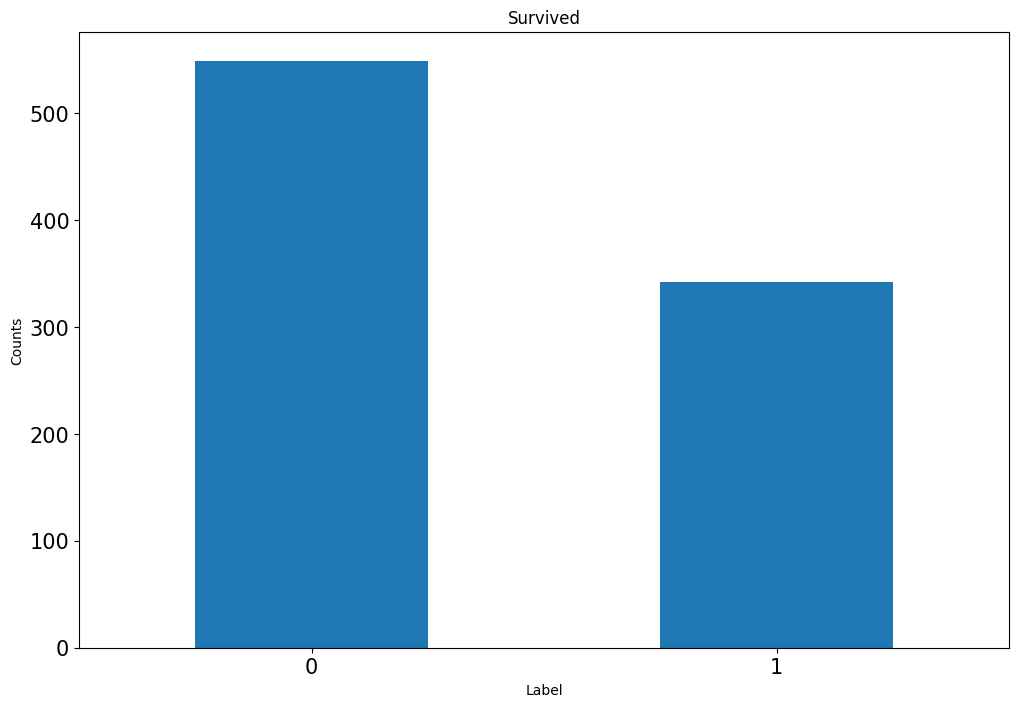

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = train_raw['Survived'].value_counts().plot(
    kind='bar',
    figsize=(12, 8),
    fontsize=15,
    rot=0,
)
ax.set_title('Survived')
ax.set_ylabel('Counts')
ax.set_xlabel('Label')
plt.show()

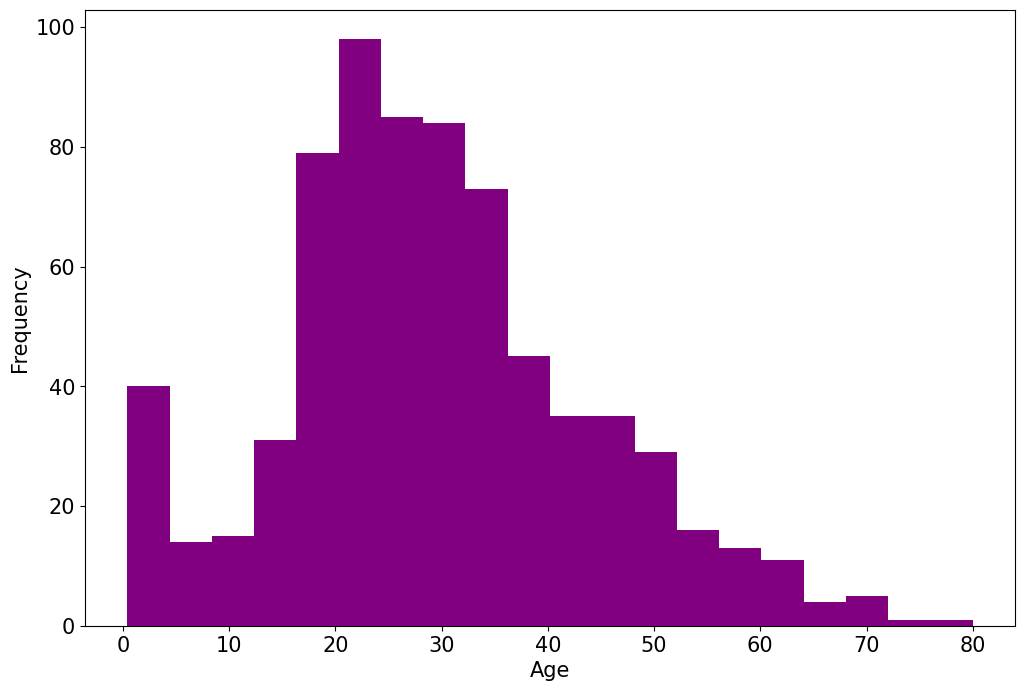

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = train_raw['Age'].plot(
    kind='hist',
    bins=20,
    color='purple',
    figsize=(12, 8),
    fontsize=15,
)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

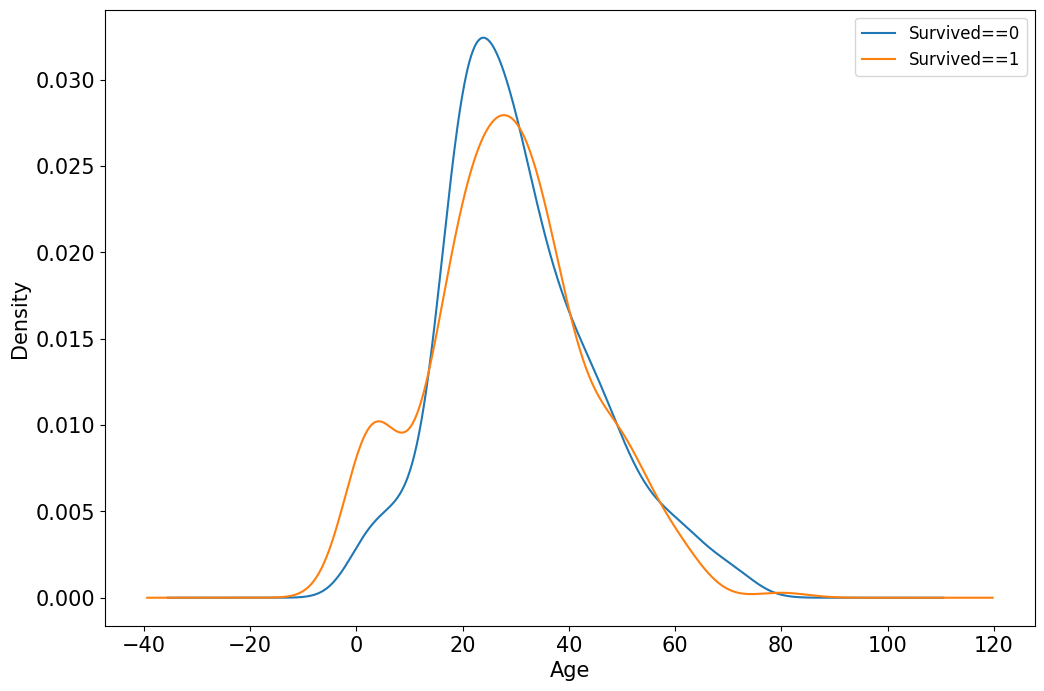

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = train_raw.query('Survived == 0')['Age'].plot(
    kind='density',
    figsize=(12, 8),
    fontsize=15,
)
train_raw.query('Survived == 1')['Age'].plot(
    kind='density',
    figsize=(12, 8),
    fontsize=15,
)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)
plt.show()

# 数据预处理


In [4]:
def preprocess(dfRaw):
    dfResult = pd.DataFrame()

    # Pclass
    dfPclass = pd.get_dummies(dfRaw['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    dfResult = pd.concat([dfResult, dfPclass], axis=1)

    # Sex
    dfSex = pd.get_dummies(dfRaw['Sex'])
    dfResult = pd.concat([dfResult, dfSex], axis=1)

    # Age
    dfResult['Age'] = dfRaw['Age'].fillna(0)
    dfResult['Age_null'] = pd.isna(dfRaw['Age']).astype('int32')

    # SibSp, Parch, Fare
    dfResult['SibSp'] = dfRaw['SibSp']
    dfResult['Parch'] = dfRaw['Parch']
    dfResult['Fare'] = dfRaw['Fare']

    # Cabin
    dfResult['Cabin_null'] = pd.isna(dfRaw['Cabin']).astype('int32')

    # Embarked
    dfEmbarked = pd.get_dummies(dfRaw['Embarked'], dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfResult = pd.concat([dfResult, dfEmbarked], axis=1)

    return dfResult


x_train = preprocess(train_raw).values
y_train = train_raw['Survived'].values
x_test = preprocess(test_raw).values
# y_test = test_raw['Survived'].values
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
# print('y_test shape:', y_test.shape)
preprocess(train_raw).head(8)

x_train shape: (891, 15)
y_train shape: (891,)
x_test shape: (418, 15)


,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,False,False,True,False,True,22.0,0,1,0,7.2500,1,False,False,True,False
1,True,False,False,True,False,38.0,0,1,0,71.2833,0,True,False,False,False
2,False,False,True,True,False,26.0,0,0,0,7.9250,1,False,False,True,False
3,True,False,False,True,False,35.0,0,1,0,53.1000,0,False,False,True,False
4,False,False,True,False,True,35.0,0,0,0,8.0500,1,False,False,True,False
5,False,False,True,False,True,0.0,1,0,0,8.4583,1,False,True,False,False
6,True,False,False,False,True,54.0,0,0,0,51.8625,0,False,False,True,False
7,False,False,True,False,True,2.0,0,3,1,21.0750,1,False,False,True,False


# 使用DataLoader和TensorDataset封装成可以迭代的数据管道


In [5]:
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

train_set = TensorDataset(torch.tensor(x_train.astype(np.float32)), torch.tensor(y_train).float().unsqueeze(1))
# 计算验证集的大小，这里使用 30% 作为验证集，70% 作为训练集
val_size = int(0.3 * len(train_set))  # 30% 的验证集
train_size = len(train_set) - val_size  # 剩下的 70% 作为训练集
# 使用 random_split 拆分数据集
train_subset, val_subset = random_split(train_set, [train_size, val_size])
train_loader = DataLoader(train_subset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=8, shuffle=False)

for features, labels in train_loader:
    print(features, labels)
    break

tensor([[  0.0000,   1.0000,   0.0000,   0.0000,   1.0000,   0.0000,   1.0000,
           0.0000,   0.0000,  13.8625,   1.0000,   1.0000,   0.0000,   0.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,   0.0000,   1.0000,
           1.0000,   0.0000,  15.5000,   1.0000,   0.0000,   1.0000,   0.0000,
           0.0000],
        [  1.0000,   0.0000,   0.0000,   1.0000,   0.0000,  48.0000,   0.0000,
           0.0000,   0.0000,  25.9292,   0.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   1.0000,   0.0000,   0.0000,   1.0000,  30.0000,   0.0000,
           0.0000,   0.0000,  13.0000,   1.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,  31.0000,   0.0000,
           0.0000,   0.0000,   7.7750,   1.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  1.0000,   0.0000,   0.0000,   0.0000,   1.0000,  17.0000,   0.0000,
           0.0000,   2.0000, 11

In [6]:
import torch.nn as nn


def create_net():
    net = nn.Sequential()
    net.add_module('fc1', nn.Linear(in_features=15, out_features=20))
    net.add_module('relu1', nn.ReLU())
    net.add_module('fc2', nn.Linear(in_features=20, out_features=15))
    net.add_module('relu2', nn.ReLU())
    net.add_module('fc3', nn.Linear(in_features=15, out_features=1))
    # 选用BCEWithLogitsLoss损失函数不需要在模型加sigmoid
    # net.add_module('sigmoid', nn.Sigmoid()) 
    return net


model = create_net()
'''
利用变长参数构建Sequential时，不能给每个层指定名称
model = nn.Sequential(
    nn.Linear(in_features=15, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=15),
    nn.ReLU(),
    nn.Linear(in_features=15, out_features=1),
)
'''
print(model)

Sequential(
  (fc1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=15, out_features=1, bias=True)
)


# 训练模型
- 脚本训练循环
- 函数训练循环
- trainer类训练循环

In [9]:
import os, sys, time
import numpy as np
import datetime
from tqdm import tqdm
from torchkeras.metrics import Accuracy
from copy import deepcopy


def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n" + "==========" * 8 + "%s" % nowtime)
    print(str(info) + "\n")


loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
metrics_dict = {'acc': Accuracy()}
epochs = 20
ckpt_dir = './checkpoint.pt'

# early stopping setup
monitor: str = 'val_acc'
mode: str = 'max'
patience: int = 5

# Initialize history with expected keys to avoid KeyError
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epoch': []
}

# loops
for epoch in range(1, epochs + 1):
    printlog(f'Epoch {epoch} / {epochs}')
    # 1，train -------------------------------------------------  
    model.train(True)
    total_loss = 0
    step = 0
    loop = tqdm(enumerate(train_loader), total=train_size, file=sys.stdout)
    train_metrics_dict = deepcopy(metrics_dict)
    epoch_log = {}  # Initialize epoch_log here to avoid scope issues

    for batch_idx, (features, labels) in loop:
        # forward
        pred = model(features)
        loss = loss_fn(pred, labels)

        # backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # metrics
        step_metrics = {"train_" + name: metric_fn(pred, labels).item() for name, metric_fn in
                        train_metrics_dict.items()}
        step_log = dict({"train_loss": loss.item()}, **step_metrics)
        total_loss += loss.item()
        step += 1
        if batch_idx != train_size - 1:
            loop.set_postfix(**step_log)
        else:
            epoch_loss = total_loss / step
            epoch_metrics = {"train_" + name: metric_fn.compute().item() for name, metric_fn in
                             train_metrics_dict.items()}
            epoch_log = dict({"train_loss": epoch_loss}, **epoch_metrics)
            loop.set_postfix(**epoch_log)

            for name, metric_fn in train_metrics_dict.items():
                metric_fn.reset()

    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]

    # 2，validate -------------------------------------------------  
    model.eval()
    total_loss = 0.0
    step = 0
    loop = tqdm(enumerate(val_loader), total=val_size, file=sys.stdout)
    val_metrics_dict = deepcopy(metrics_dict)

    with torch.no_grad():
        for batch_idx, (features, labels) in loop:
            # forward
            pred = model(features)
            loss = loss_fn(pred, labels)

            # metrics
            step_metrics = {"val_" + name: metric_fn(pred, labels).item() for name, metric_fn in
                            val_metrics_dict.items()}
            step_log = dict({"val_loss": loss.item()}, **step_metrics)
            total_loss += loss.item()
            step += 1
            if batch_idx != val_size - 1:
                loop.set_postfix(**step_log)
            else:
                epoch_loss = total_loss / step
                epoch_metrics = {"val_" + name: metric_fn.compute().item() for name, metric_fn in
                                 val_metrics_dict.items()}
                epoch_log = dict({"val_loss": epoch_loss}, **epoch_metrics)
                loop.set_postfix(**epoch_log)

                for name, metric_fn in val_metrics_dict.items():
                    metric_fn.reset()

    epoch_log['epoch'] = epoch
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]

    # 3，early stopping -------------------------------------------------  
    arr_scores = history[monitor]
    best_score_idx = np.argmax(arr_scores) if mode == 'max' else np.argmin(arr_scores)
    if best_score_idx == len(arr_scores) - 1:
        torch.save(model.state_dict(), ckpt_dir)
        print(f'<<<<<< reach best {monitor} : {arr_scores[best_score_idx]}')
    if len(arr_scores) - best_score_idx > patience:
        print(f'<<<<<< {monitor} without improvement in {patience} epoch, early stopping >>>>>>')
        break
    model.load_state_dict(torch.load(ckpt_dir))


================================================================================2025-02-21 11:04:59
Epoch 1 / 20

 13%|█▎        | 34/267 [00:00<00:00, 956.63it/s, val_acc=0.333, val_loss=1]


ValueError: attempt to get argmax of an empty sequence